## Creating Lightcurve of VW Hyi

In [1]:
%run Building_DataFrames.ipynb

### TICID: 25133286 , Name: VW Hyi
The a_fast-lc files are the cleaned up versions

In [2]:
df = selected[(selected['name']=='VW Hyi') & (selected['file_type']=='a_fast-lc')]
time = []
flux = []
for index in df.index:
    with fits.open(df.loc[index,'file_name'], mode="readonly") as hdulist:
            time += [hdulist[1].data['TIME']]
            flux += [hdulist[1].data['PDCSAP_FLUX']]
        
# fig = plt.figure(figsize=(10,8))
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
# (ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
# fig.suptitle('TICID:{tic}'.format(tic=df['TICID'][0]))
# ax1.plot(time[0], flux[0], label='Sector:{sector}'.format(sector=df['SECTOR'][0]))
# ax2.plot(time[1], flux[1])
# ax3.plot(time[2], flux[2])
# ax4.plot(time[3], flux[3])
# ax1.legend()
         

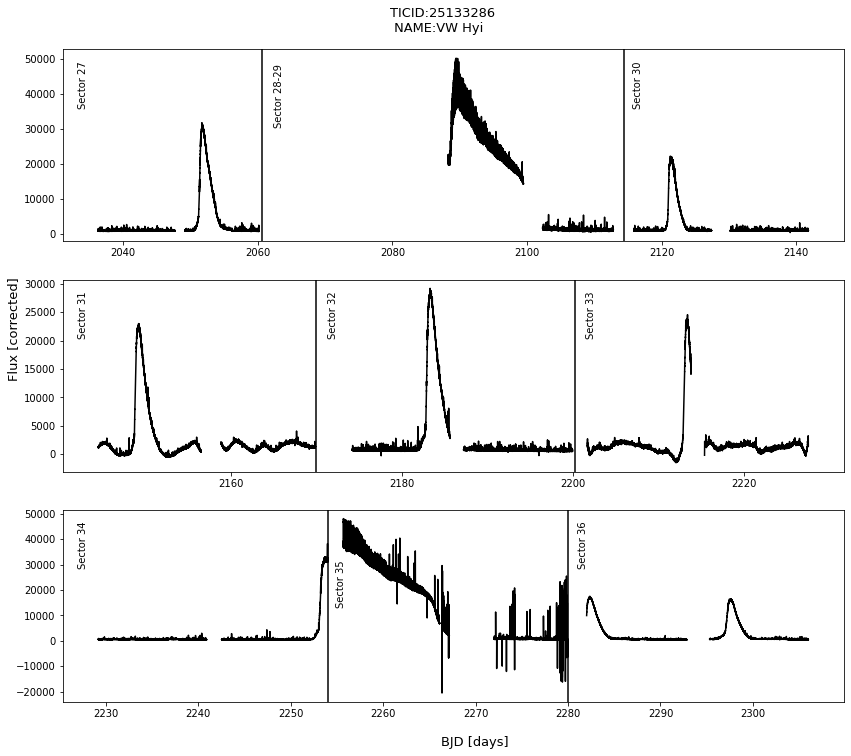

In [141]:
x1 = np.concatenate((time[0], time[1],time[2]),axis=0)
f1 = np.concatenate((flux[0],flux[1],flux[2]),axis=0) 

x2 = np.concatenate((time[3],time[4], time[5]),axis=0)
f2 = np.concatenate((flux[3],flux[4],flux[5]), axis=0)

x3 = np.concatenate((time[6],time[7], time[8]),axis=0)
f3 = np.concatenate((flux[6],flux[7],flux[8]), axis=0)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14,12))
fig.text(.45,.9,'TICID:{tic} \n NAME:{n}'.format(tic=df['TICID'][0], n=df['name'][0]), size=13)
fig.text(.07,.5,'Flux [corrected]',rotation='vertical', size=13)
fig.text(.5,.074,'BJD [days]', size=13)


ax1.plot(x1, f1,c='k')
ax1.axvline(x=time[0][-1],c='k')
ax1.axvline(x=time[1][-1],c='k')
ax1.text(.02, .7, 'Sector 27', transform=ax1.transAxes, rotation='vertical')
ax1.text(.27, .6, 'Sector 28-29', transform=ax1.transAxes, rotation='vertical')
ax1.text(.73, .7, 'Sector 30', transform=ax1.transAxes, rotation='vertical')



ax2.plot(x2, f2, c='k')
ax2.axvline(x=time[3][-1],c='k')
ax2.axvline(x=time[4][-1],c='k')
ax2.text(.02, .7, 'Sector 31', transform=ax2.transAxes, rotation='vertical')
ax2.text(.34, .7, 'Sector 32', transform=ax2.transAxes, rotation='vertical')
ax2.text(.67, .7, 'Sector 33', transform=ax2.transAxes, rotation='vertical')



ax3.plot(x3, f3, c='k')
ax3.axvline(x=time[6][-1],c='k')
ax3.axvline(x=time[7][-1],c='k')
ax3.text(.02, .7, 'Sector 34', transform=ax3.transAxes, rotation='vertical')
ax3.text(.35, .5, 'Sector 35', transform=ax3.transAxes, rotation='vertical')
ax3.text(.66, .7, 'Sector 36', transform=ax3.transAxes, rotation='vertical')
plt.savefig('VW_Hyi_LC');



## Creating Color-Color Plots